<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

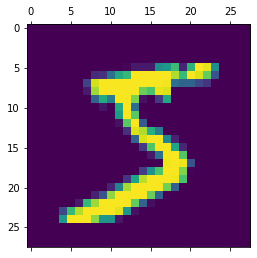

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
len(X_train)

60000

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2731 - accuracy: 0.6823
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5318 - accuracy: 0.8661
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4072 - accuracy: 0.8902
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3592 - accuracy: 0.8999
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3333 - accuracy: 0.9050


In [21]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [22]:
model.get_weights()

[array([[-0.01637305,  0.00173604,  0.0756471 , ..., -0.04586843,
          0.06863521, -0.00673629],
        [ 0.08079924,  0.06726138, -0.02101226, ..., -0.00389663,
         -0.07277519, -0.04203775],
        [-0.08231453, -0.02808342, -0.00637116, ..., -0.03451372,
          0.05266641,  0.03993186],
        ...,
        [-0.01315822,  0.06620285, -0.0779153 , ..., -0.00220808,
          0.02558107,  0.05188084],
        [-0.05721766,  0.05714746,  0.00155655, ...,  0.06916575,
          0.01799724,  0.07779767],
        [ 0.01584839,  0.02681389, -0.03671225, ..., -0.00997752,
         -0.07680234,  0.06729494]], dtype=float32),
 array([ 0.40212506,  0.18816735,  0.06830054,  0.03517458, -0.00749339,
        -0.00656343,  0.17336494,  0.24340092, -0.01028569,  0.16851039,
         0.32414904, -0.01032145,  0.08810031,  0.22664252, -0.00758657,
         0.2627083 ,  0.12087968, -0.00586081,  0.20870413,  0.29175785,
         0.27582464,  0.1381596 , -0.00554727,  0.26064292,  0.139